In [1]:
import numpy as np
import matplotlib.pyplot as plt

import utils

In [2]:
%ls -R spectra/

HD110379/    X0319/       X0538/       ardata.fits
HD186791/    X0386/       X0771/

spectra//HD110379:
BG20000                              tellstar_qvir_ordens_finalglue.fits
obs_HD110379_ordens_finalglue.fits

spectra//HD186791:
BG20000                               tellstar_35aql_ordens_finalglue.fits
obs_HD186791_ordens_finalglue.fits

spectra//X0319:
X0319_N_O_E.fits            X0319_U_O_E_TRA.fits
X0319_N_O_E_TAC_final.fits  X0319_V_O_E.fits
X0319_N_O_E_TRA.fits        X0319_V_O_E_TAC_final.fits
X0319_U_O_E.fits            X0319_V_O_E_TRA.fits
X0319_U_O_E_TAC.fits

spectra//X0386:
X0386_N_N_E.fits            X0386_U_N_E_TRA.fits
X0386_N_N_E_TAC_final.fits  X0386_V_N_E.fits
X0386_N_N_E_TRA.fits        X0386_V_N_E_TAC_final.fits
X0386_U_N_E.fits            X0386_V_N_E_TRA.fits
X0386_U_N_E_TAC.fits

spectra//X0538:
X0538_N_N_E.fits            X0538_U_N_E_TRA.fits
X0538_N_N_E_TAC_final.fits  X0538_V_N_E.fits
X0538_N_N_E_TRA.fits        X0538_V_N_E_TAC_final.fits
X0538_U_N_E.fits    

In [3]:
WL_START = 800
WL_END = 820

In [4]:
def slice_spectrum_region(flux, wl,
                          start_wavelength=800, end_wavelength=850):
    idx_start, _ = utils.find_nearest(obs_wl, WL_START)
    _, idx_end = utils.find_nearest(obs_wl, WL_END)
    
    flux = flux[idx_start: idx_end]
    wl = wl[idx_start: idx_end]
    
    return flux, wl

In [5]:
def normalize_by_max(flux):
    max_value = np.amax(flux) / 1.01
    return flux / max_value

In [6]:
def relative_diff(obs, div):
    diff = obs - div
    norm_diff = np.linalg.norm(diff)
    obs_norm = np.linalg.norm(obs)
    rel_diff = norm_diff**2 / obs_norm**2
    
    return rel_diff

In [7]:
def vector_difference(obs, div):
    diff = obs - div
    rel_diff = diff / obs
    
    return rel_diff

## Plot divided spectrums for X-Shooter stars

### X0319

In [8]:
X0319_obs_flux, X0319_obs_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0319/X0319_V_O_E.fits')
X0319_tel_flux, X0319_tel_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0319/X0319_V_O_E_TRA.fits')
X0319_corr_flux, X0319_corr_wl = utils.get_spectrum_data_and_wavelength('spectra/X0319/X0319_V_O_E_TAC_final.fits')

In [9]:
X0319_obs_flux = normalize_by_max(X0319_obs_flux)
X0319_corr_flux = normalize_by_max(X0319_corr_flux)

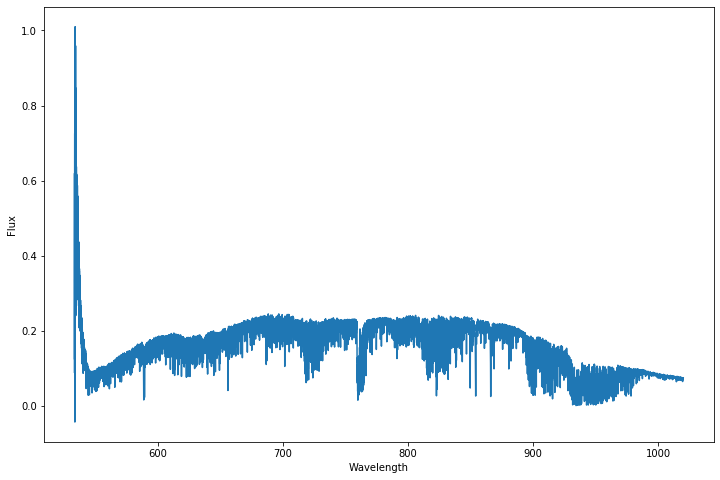

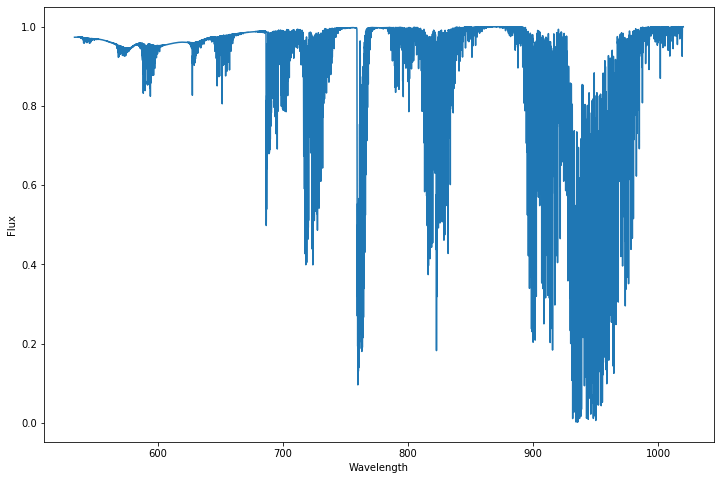

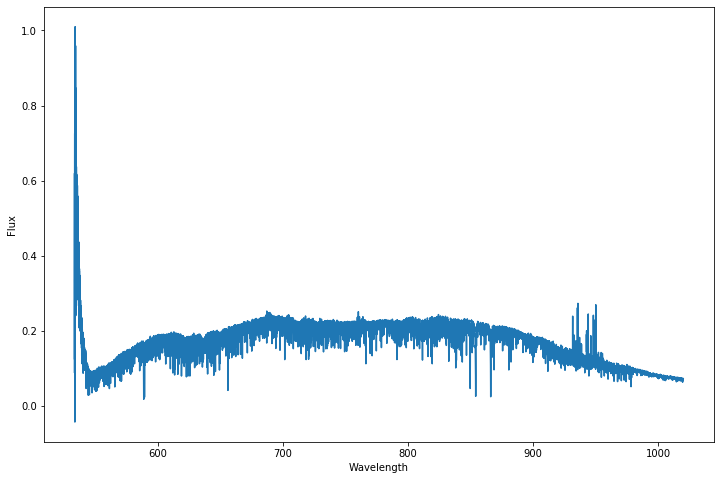

In [10]:
utils.plot_spectrum(X0319_obs_flux, X0319_obs_wl)
utils.plot_spectrum(X0319_tel_flux, X0319_tel_wl)
utils.plot_spectrum(X0319_corr_flux, X0319_corr_wl)

In [11]:
X0319_div_flux = X0319_obs_flux / X0319_tel_flux

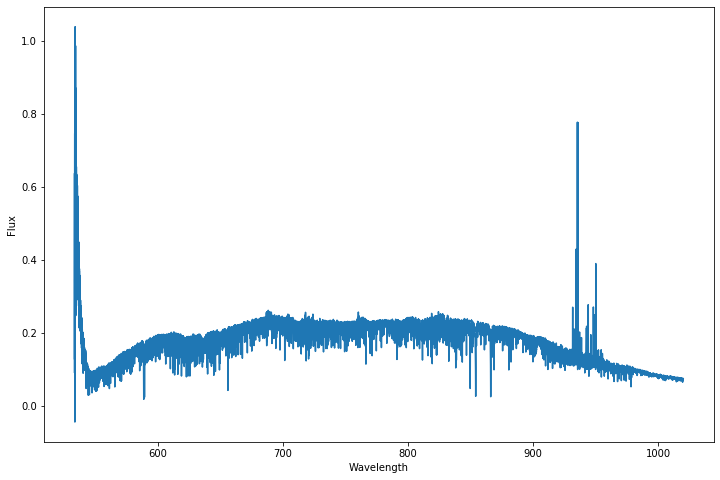

In [12]:
utils.plot_spectrum(X0319_div_flux, X0319_obs_wl)

In [41]:
print(f'Diferença relativa entre observado e dividido: {relative_diff(X0319_obs_flux, X0319_div_flux)}')
print(f'Diferença relativa entre observado e ground truth: {relative_diff(X0319_obs_flux, X0319_corr_flux)}')

Diferença relativa entre observado e dividido: 0.035860274732847586
Diferença relativa entre observado e ground truth: 0.029102274774904593


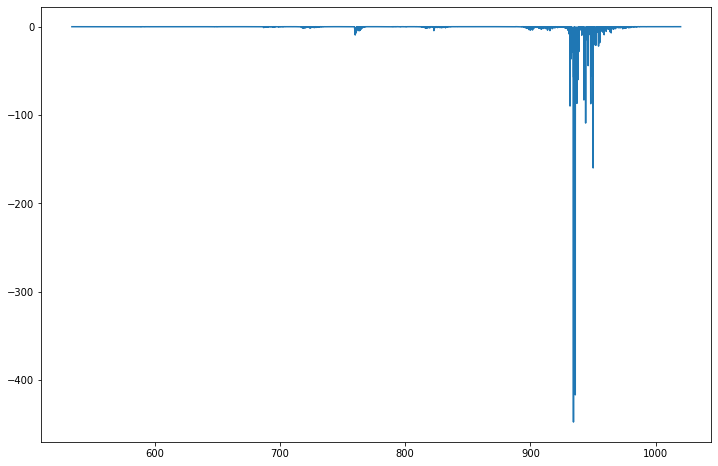

In [15]:
plt.plot(X0319_obs_wl, vector_difference(X0319_obs_flux, X0319_div_flux))

### X0386

In [16]:
X0386_obs_flux, X0386_obs_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0386/X0386_V_N_E.fits')
X0386_tel_flux, X0386_tel_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0386/X0386_V_N_E_TRA.fits')
X0386_corr_flux, X0386_corr_wl = utils.get_spectrum_data_and_wavelength('spectra/X0386/X0386_V_N_E_TAC_final.fits')

In [17]:
X0386_obs_flux = normalize_by_max(X0386_obs_flux)
X0386_corr_flux = normalize_by_max(X0386_corr_flux)

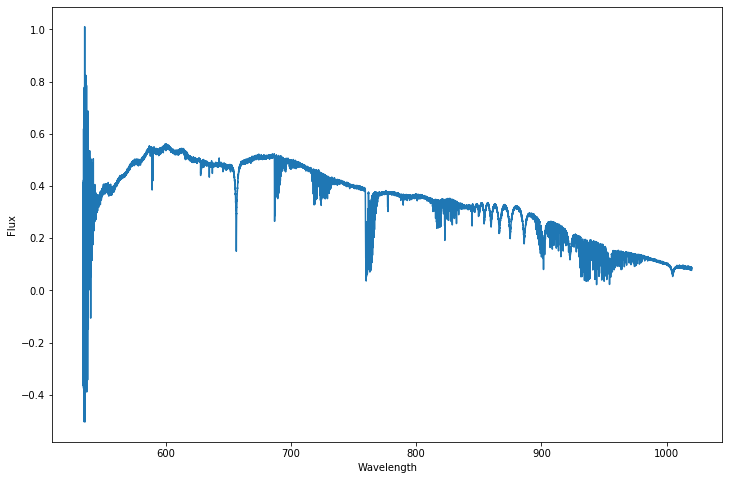

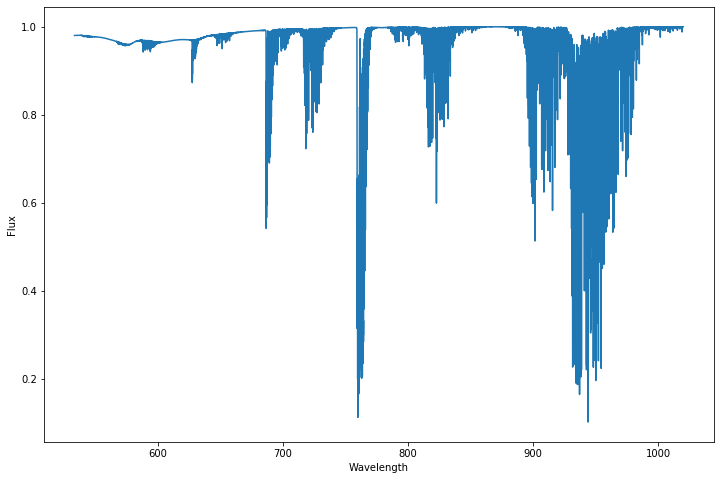

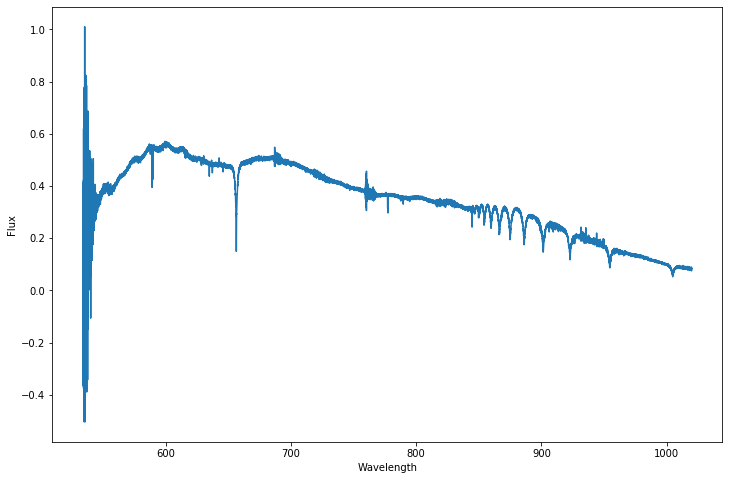

In [18]:
utils.plot_spectrum(X0386_obs_flux, X0386_obs_wl)
utils.plot_spectrum(X0386_tel_flux, X0386_tel_wl)
utils.plot_spectrum(X0386_corr_flux, X0386_corr_wl)

In [19]:
X0386_div_flux = X0386_obs_flux / X0386_tel_flux

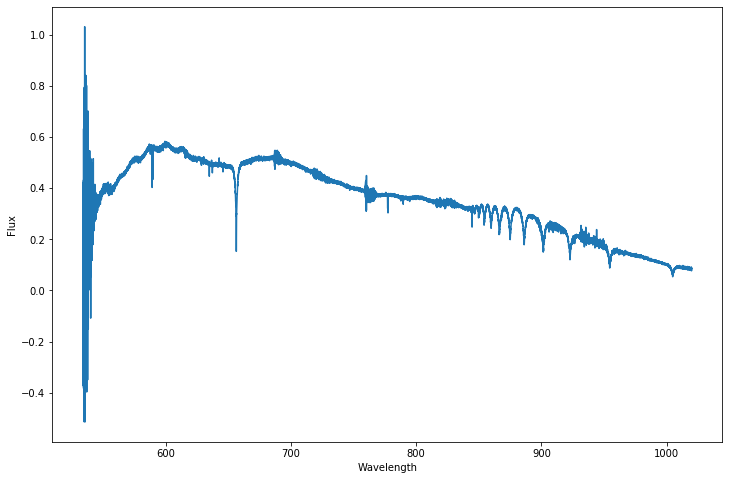

In [20]:
utils.plot_spectrum(X0386_div_flux, X0386_obs_wl)

In [42]:
print(f'Diferença relativa entre observado e dividido: {relative_diff(X0386_obs_flux, X0386_div_flux)}')
print(f'Diferença relativa entre observado e ground truth: {relative_diff(X0386_obs_flux, X0386_corr_flux)}')

Diferença relativa entre observado e dividido: 0.006545022715282888
Diferença relativa entre observado e ground truth: 0.005853594411830478


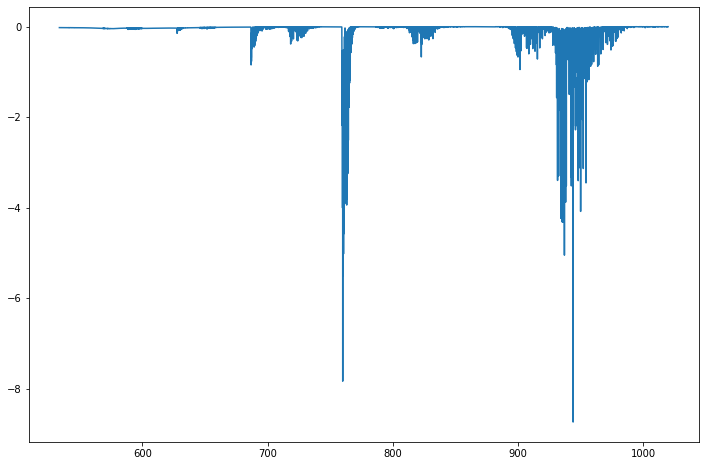

In [22]:
plt.plot(X0386_obs_wl, vector_difference(X0386_obs_flux, X0386_div_flux))

### X0538

In [23]:
X0538_obs_flux, X0538_obs_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0538/X0538_V_N_E.fits')
X0538_tel_flux, X0538_tel_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0538/X0538_V_N_E_TRA.fits')
X0538_corr_flux, X0538_corr_wl = utils.get_spectrum_data_and_wavelength('spectra/X0538/X0538_V_N_E_TAC_final.fits')

In [24]:
X0538_obs_flux = normalize_by_max(X0538_obs_flux)
X0538_corr_flux = normalize_by_max(X0538_corr_flux)

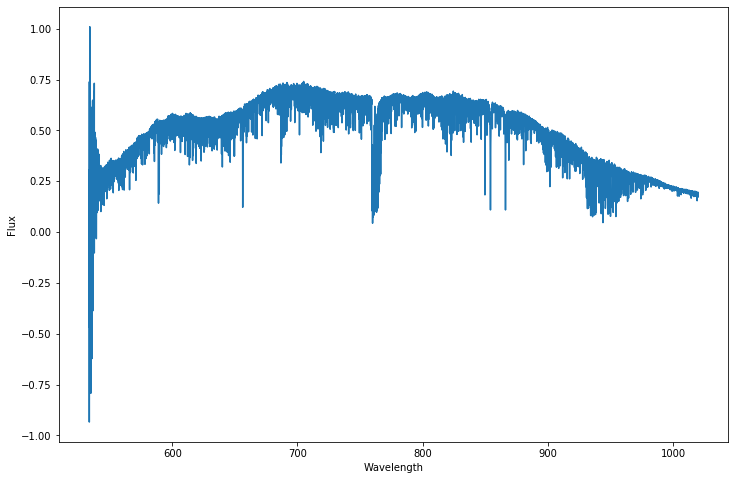

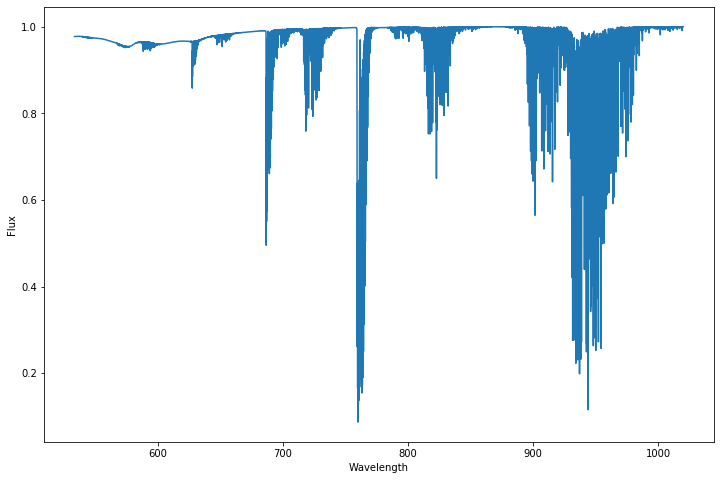

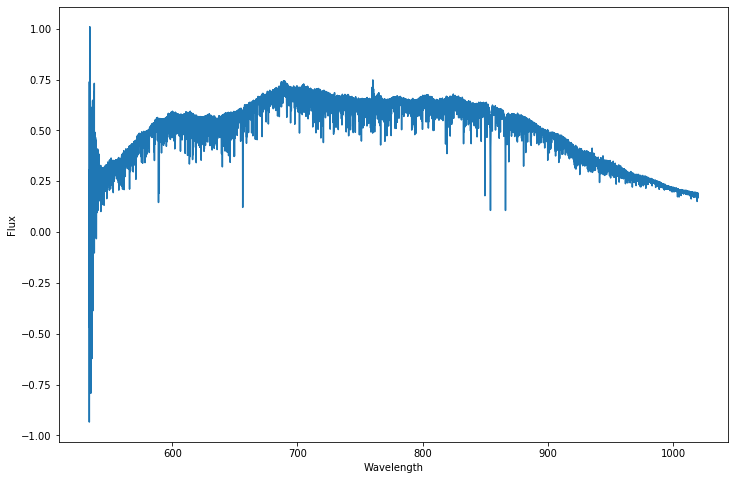

In [25]:
utils.plot_spectrum(X0538_obs_flux, X0538_obs_wl)
utils.plot_spectrum(X0538_tel_flux, X0538_tel_wl)
utils.plot_spectrum(X0538_corr_flux, X0538_corr_wl)

In [26]:
X0538_div_flux = X0538_obs_flux / X0538_tel_flux

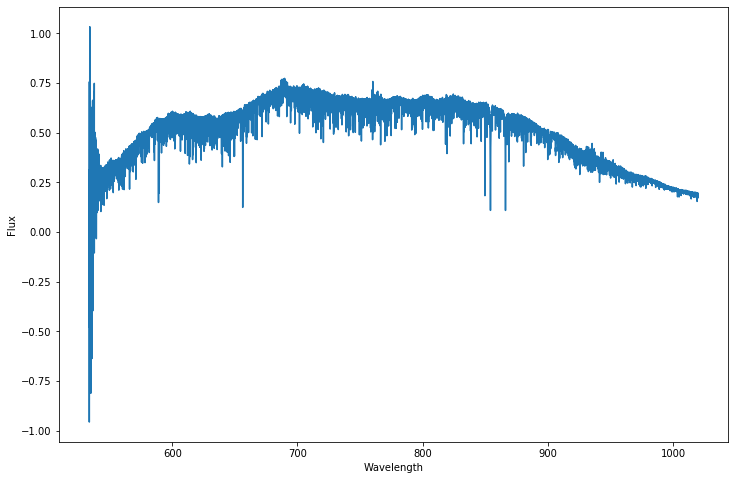

In [27]:
utils.plot_spectrum(X0538_div_flux, X0538_obs_wl)

In [43]:
print(f'Diferença relativa entre observado e dividido: {relative_diff(X0538_obs_flux, X0538_div_flux)}')
print(f'Diferença relativa entre observado e ground truth: {relative_diff(X0538_obs_flux, X0538_corr_flux)}')

Diferença relativa entre observado e dividido: 0.00890289235520561
Diferença relativa entre observado e ground truth: 0.007986185025812451


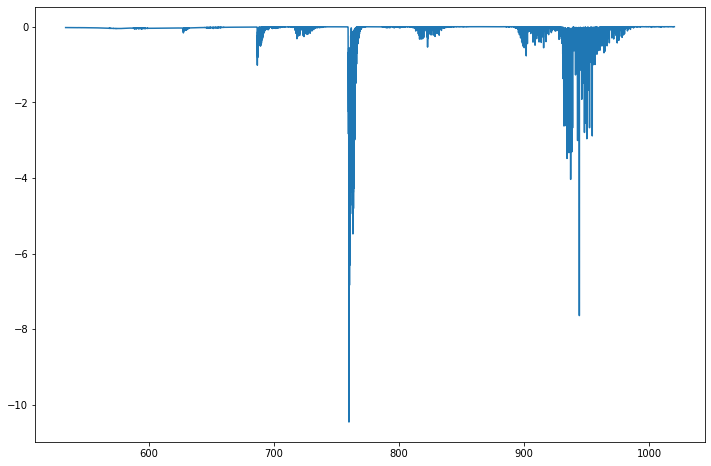

In [29]:
plt.plot(X0538_obs_wl, vector_difference(X0538_obs_flux, X0538_div_flux))

### X0771

In [30]:
X0771_obs_flux, X0771_obs_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0771/X0771_V_N_E.fits')
X0771_tel_flux, X0771_tel_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0771/X0771_V_N_E_TRA.fits')
X0771_corr_flux, X0771_corr_wl = utils.get_spectrum_data_and_wavelength('spectra/X0771/X0771_V_N_E_TAC_final.fits')

In [31]:
X0771_obs_flux = normalize_by_max(X0771_obs_flux)
X0771_corr_flux = normalize_by_max(X0771_corr_flux)

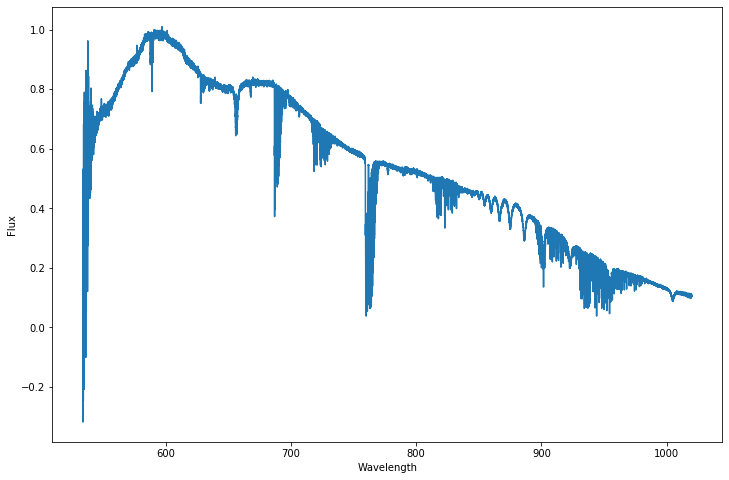

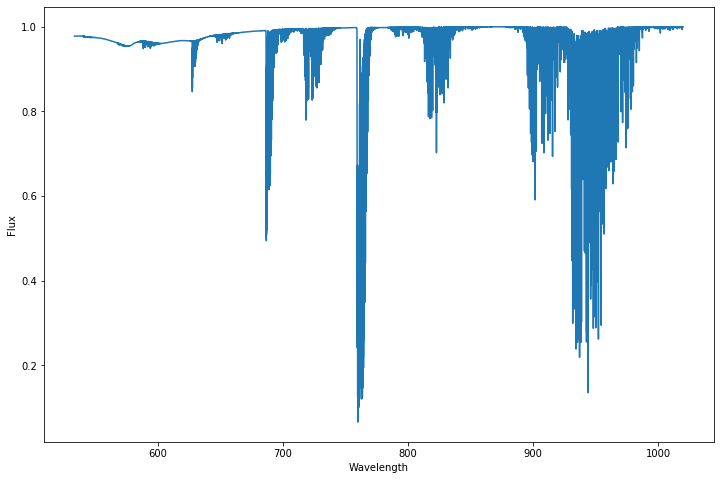

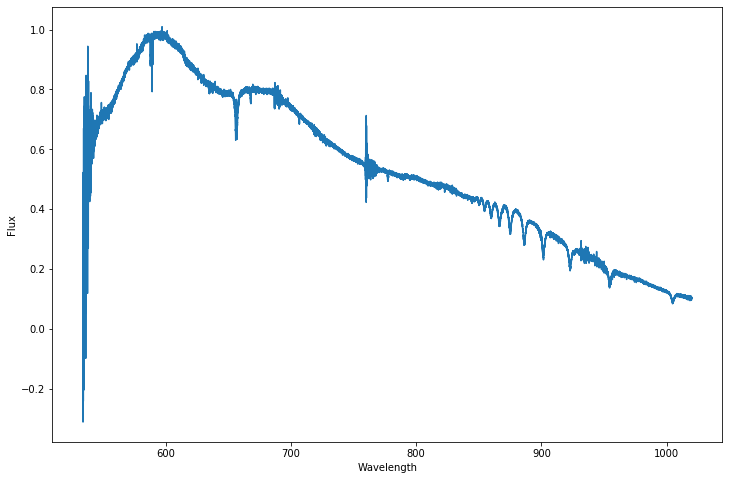

In [32]:
utils.plot_spectrum(X0771_obs_flux, X0771_obs_wl)
utils.plot_spectrum(X0771_tel_flux, X0771_tel_wl)
utils.plot_spectrum(X0771_corr_flux, X0771_corr_wl)

In [33]:
X0771_div_flux = X0771_obs_flux / X0771_tel_flux

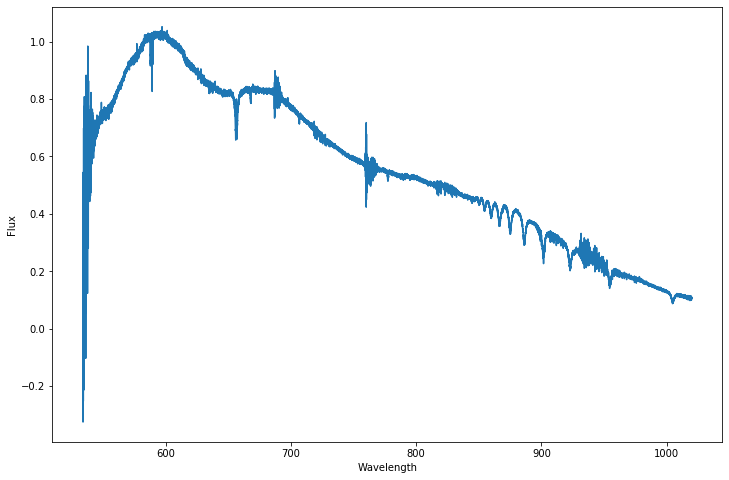

In [34]:
utils.plot_spectrum(X0771_div_flux, X0771_obs_wl)

In [44]:
print(f'Diferença relativa entre observado e dividido: {relative_diff(X0771_obs_flux, X0771_div_flux)}')
print(f'Diferença relativa entre observado e ground truth: {relative_diff(X0771_obs_flux, X0771_corr_flux)}')

Diferença relativa entre observado e dividido: 0.005249243620199789
Diferença relativa entre observado e ground truth: 0.0044626747351821615


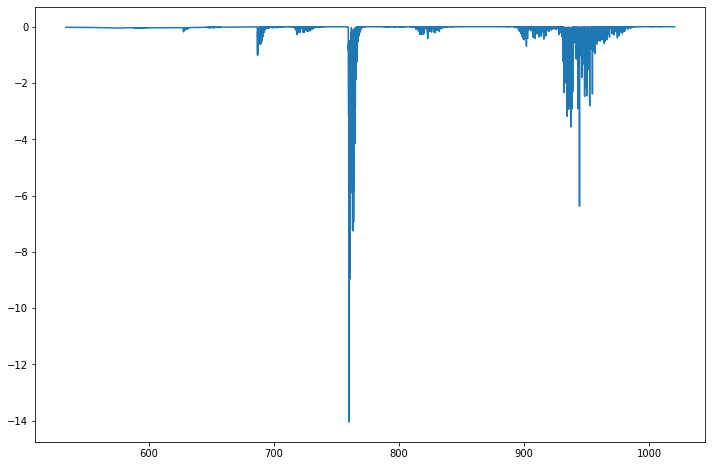

In [45]:
plt.plot(X0771_obs_wl, vector_difference(X0771_obs_flux, X0771_div_flux))

As regiões mais problemáticas dos espectros divididos parecem estar concetradas na faixa dos 700-800nm e 900-1000nm, isso foi verificado para as 4 estrelas do X-Shooter.